In [2]:
%pip install numpy pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importing Dataset
data=pd.read_csv("../assets/Student_Performance.csv").head(100)
pd.shape()
# X=data.iloc[:,2]
# Y=data.iloc[:,-2]
# print(X.head())
# print(Y.head())

TypeError: 'tuple' object is not callable

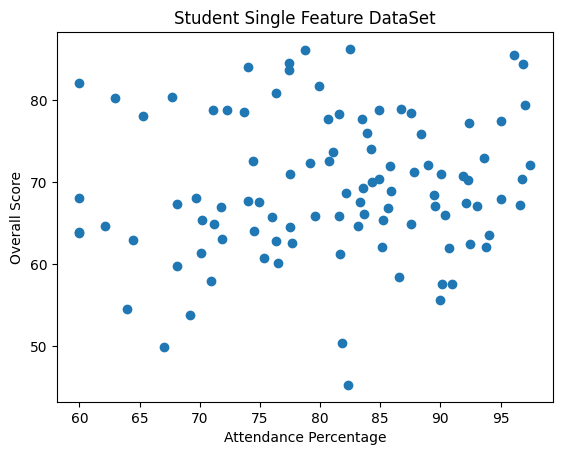

In [6]:
# Plotting the Student Data Set
fig, plot_data_set = plt.subplots()
plot_data_set.set_title("Student Single Feature DataSet")
plot_data_set.set_xlabel("Attendance Percentage")
plot_data_set.set_ylabel("Overall Score")
plot_data_set.scatter(X,Y,label="Data Points")

fig.savefig("../assets/student_single_feature_dataset.png", bbox_inches='tight')

plt.show()

In [7]:
# Theee Modeeellll
m = 0
c = 0

alpha = 0.000001  # The learning Rate
epochs = 450  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

history = [] # To store (m, c) at each epoch to animate the gif

cost_history = []

# Performing Gradient Descent
for i in range(epochs):
    Y_pred = m*X + c  # The current predicted value of Y

    #calculate the cost 
    cost = (1/n)*sum((Y-Y_pred)**2)
    cost_history.append(cost)

    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c

    m = m - alpha * D_m  # Update m
    c = c - alpha * D_c  # Update c

    # Store the current state
    history.append((m, c))

final_m, final_c = m, c
print(f"Final Weights: m={m}, c={c}")

Final Weights: m=0.8416857187774708, c=0.011071229360255518


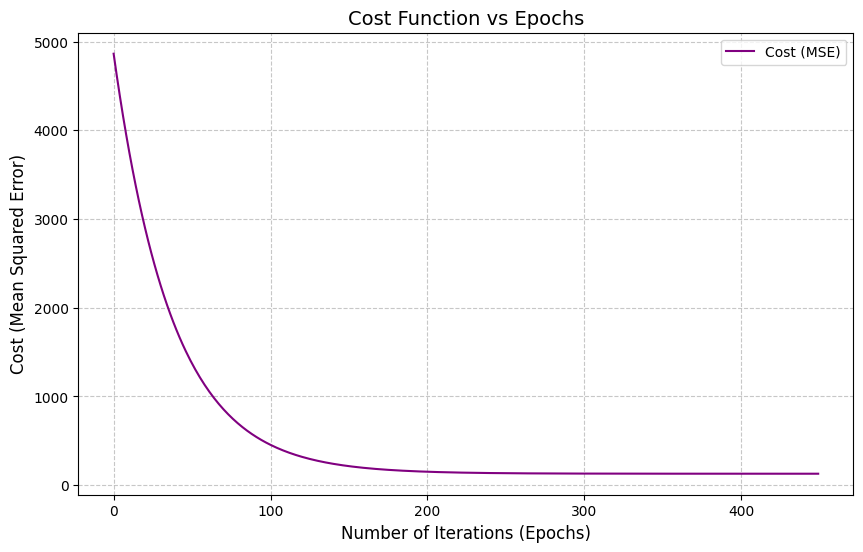

Initial Cost: 4863.796728
Final Cost: 128.8566671768093


In [8]:
# 4. Plotting the Cost Function
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), cost_history, color='purple', label='Cost (MSE)')

# Adding labels and titles
plt.title("Cost Function vs Epochs", fontsize=14)
plt.xlabel("Number of Iterations (Epochs)", fontsize=12)
plt.ylabel("Cost (Mean Squared Error)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.savefig('../assets/student_single_feature_cost.png', dpi=300)

# Show the plot
plt.show()

print(f"Initial Cost: {cost_history[0]}")
print(f"Final Cost: {cost_history[-1]}")

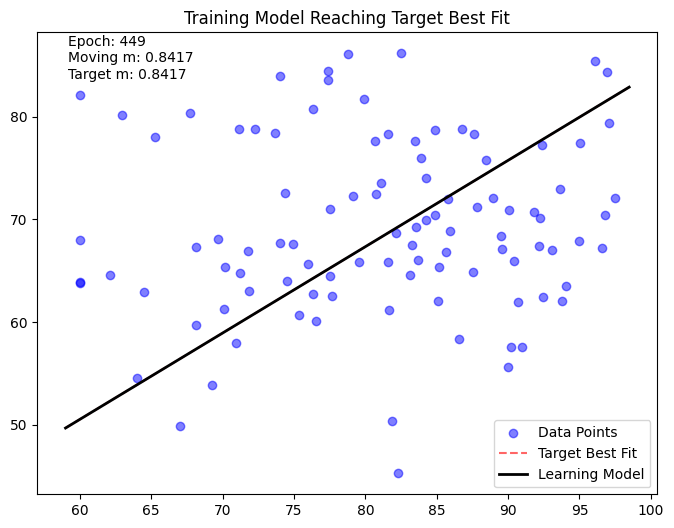

In [9]:
# --- Animation Setup ---
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, Y, color='blue', label='Data Points', alpha=0.5)

# DRAW THE TARGET LINE (Static Red Line)
x_range = np.array([min(X)-1, max(X)+1])
y_target = final_m * x_range + final_c
ax.plot(x_range, y_target, color='red', linestyle='--', alpha=0.6, label='Target Best Fit')

# SETUP THE MOVING LINE (The learning line)
line, = ax.plot([], [], color='black', lw=2, label='Learning Model')
text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

ax.set_title("Training Model Reaching Target Best Fit")
ax.legend()

# --- 4. Animation Logic ---
def init():
    line.set_data([], [])
    text.set_text('')
    return line, text

def animate(i):
    curr_m, curr_c = history[i]
    y_vals = curr_m * x_range + curr_c
    line.set_data(x_range, y_vals)
    
    # Slow down the visual by adding the epoch count
    text.set_text(f'Epoch: {i}\nMoving m: {curr_m:.4f}\nTarget m: {final_m:.4f}')
    return line, text

# --- 5. Control Speed and Save ---
# To slow it down: increase 'interval' (ms) and decrease 'fps'
anim = FuncAnimation(fig, animate, init_func=init, 
                     frames=len(history), interval=50, blit=True)

# Add a pause at the end by extending history
history.extend([history[-1]] * 40) 

anim.save('../assets/student_single_feature_training.gif', writer='pillow', fps=30)
plt.show()